In [1]:
%load_ext autoreload
%autoreload 2

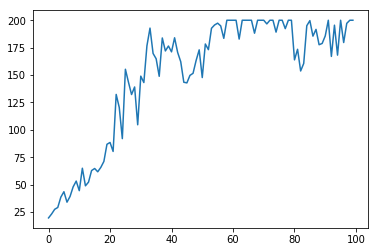

In [3]:
from IPython import display
import matplotlib

from rl.algs import plotter
from rl.algs.pg import *


matplotlib.pyplot.ion()

NUM_TRAIN_ITERS = 100
MAX_STEPS_PER_EPISODE = None  # default: None
STEPS_PER_BATCH = 1000
env = Environment(max_episode_steps=MAX_STEPS_PER_EPISODE)
policy = Policy(env.ob_dim, env.ac_dim)

plt = plotter.Plotter()
fig = plt.create_fig()

for i in range(NUM_TRAIN_ITERS):
  eps_batch = env.sample_rollouts(policy.get_action, STEPS_PER_BATCH)
  m = policy.update(eps_batch)
  plt.add_data(i, np.mean(m['r_per_eps']))

plt.line_plot(fig)
plt.render()

try:
  _ = env.sample_rollouts(policy.get_action, 1, render=True)
finally:
  env.env.render(close=True)
